# Решение задачи регрессии: линейная модель

## Линейная модель без штрафов

Для получения параметров обученной модели используют атрибуты:

**коэффициенты** - coef_

**свободный член** - intercept_

Если intercept_ = 0, то график проходит через начало координат.

Если при обучении параметр fit_intersept=False, то автоматически устанавливается 0 и решение центрируется относительно начала координат.

### Примеры

**Пример 1**

Заданы 3 точки в пространстве.

Построить линейный тренд.

In [1]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit ([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.coef_

array([0.5, 0.5])

In [ ]:
reg.intercept_

1.1102230246251565e-16

По заданным точкам построена модель:

y = 0.5x_0 + 0.5x_1

**Пример 2**

Заданы пары признаков. Целевую переменную вычислим по формуле и построим линейную модель.

In [8]:
import numpy as np

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

# зададим зависимость:
# y = 1 * x_0 + 2 * x_1 + 3
# dot - вычисляет скалярное произведение массивов
y = np.dot(X, np.array([1, 2])) + 3
# добавим небольшую случайную погрешность
y = y + np.random.normal()*0.5
print(y)
reg = linear_model.LinearRegression().fit(X, y)
# метод score возвращает коэффициент детерминации R^2
print("R^2=", reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)
print(reg.predict(np.array([[3, 5]])))

[ 5.20382622  7.20382622  8.20382622 10.20382622]
R^2= 1.0
[1. 2.]
2.203826224429049
[15.20382622]


## Линейная регрессия со штрафами
### Ridge - модель

В примерах изменяется коэффициент штрафа

In [9]:
reg = linear_model.Ridge(alpha=0.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
reg.coef_

array([0.34545455, 0.34545455])

In [10]:
reg = linear_model.Ridge(alpha=0.1)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
reg.coef_

array([0.44186047, 0.44186047])

### Lasso - модель

In [11]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])
reg.predict([[1, 1]])

array([0.8])

In [12]:
reg = linear_model.Lasso(alpha=0.5)
reg.fit([[0, 0], [1, 1]], [0, 1])
reg.predict([[1, 1]])

array([0.5])

**Сравните результаты при разных значениях параметра alpha**

### Elastic Net - модель

Используется сгенерированный набор данных

In [13]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

X, y = make_regression(n_features=2, random_state=0)
print(X.shape)
regr = ElasticNet(random_state=0)
regr.fit(X, y)
print(regr.coef_)
print(regr.score(X, y))
print(regr.predict([[0, 0]]))

(100, 2)
[18.83816048 64.55968825]
0.8904453086976037
[1.45126076]


## Прогноз стоимости домов

### Описание набора данных
Number of Instances: 506

Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.
 Attribute Information:
  1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over           25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds             river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks       by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's


    1. CRIM уровень преступности на душу населения по городу
     2. ZN Доля земель жилой застройки с участками свыше 25 000 кв. футов
     3. INDUS Доля (по площади, акров) неторгового бизнеса на город
     4. CHAS Бинарная переменная (= 1, если границы участка река Charles River; 0 иначе)
     5. NOX Концентрация оксидов азота NOX (частиц на 10 млн)
     6. RM среднее количество комнат в доме
     7. AGE Доля жилищ, занимаемых владельцами, построенных до 1940 г.
     8. DIS Взвешенные расстояния до пяти центров занятости Бостона.
     9. RAD Индекс доступности радиальных магистралей.
     10. TAX Полная ставка налога на имущество за 10 000 долларов США.
     11. PTRATIO Соотношение учеников и учителей по городу
     12. B 1000(Bk - 0,63)^2, где Bk — доля черных по городу
     13. LSTAT % населения, имеющего низкий статус
     14. MEDV Средняя стоимость домов, занимаемых владельцами, в 1000 долларов.




In [14]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

 data (данные о домах), target (цены), feature_names (имена признаков).

In [15]:
feature_names =['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

Можно представить данные в виде таблицы:

In [16]:
bos_df = pd.DataFrame(data, columns=feature_names)

In [17]:
print(bos_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


5-й элемент записи о доме (RM) - среднее число комнат в доме

In [18]:
x = data[:, 5]
x[:5]

array([6.575, 6.421, 7.185, 6.998, 7.147])

Цена

In [19]:
y = target
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

Построим диаграмму, показывающую предполагаемую зависимость цены от числа комнат

In [20]:
from matplotlib import pyplot as plt

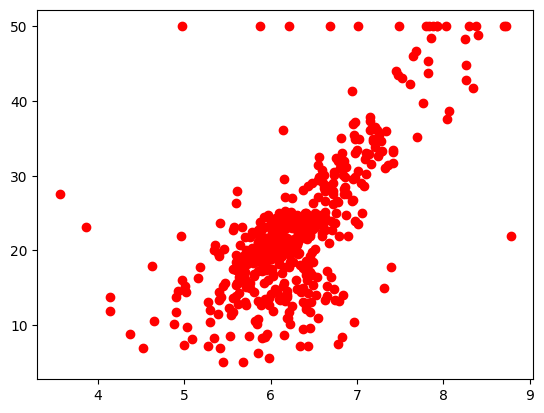

In [21]:
plt.scatter(x, y, color = 'r')

Преобразование массива x в 2D для использования в обучении модели

In [22]:
import numpy as np
x = np.transpose(np.atleast_2d(x))
x.shape

(506, 1)

Создание объекта-модели, обучение и прогноз (аппроксимация)

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)
y_predicted = lr.predict(x)

Построение графика

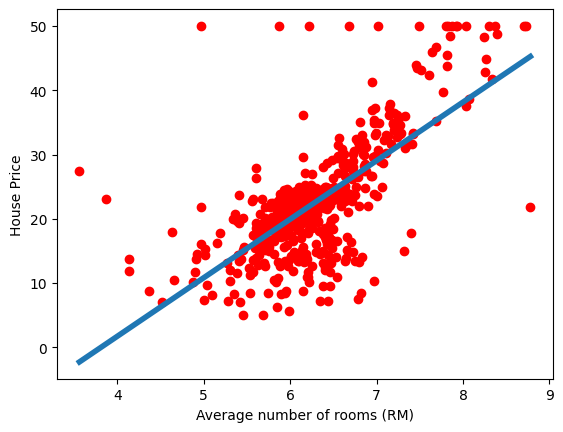

In [24]:
fig, ax = plt.subplots()
ax.scatter(data[:, 5], target, color = 'r')
ax.set_xlabel("Average number of rooms (RM)")
ax.set_ylabel("House Price")
xmin = x.min()
xmax = x.max()
ax.plot([xmin, xmax], lr.predict([[xmin], [xmax]]) , '-', lw=4)
plt.show()

Можно оценить качество аппроксимации, т.е. близость прогнозных и истинных значений, на основе среднеквадратичного отклонения и коэффициента детерминации с помощью функционала sklearn

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, lr.predict(x))
print ('MSE на обучающей выборке = {:.4}'.format(mse))

MSE на обучающей выборке = 43.6


In [26]:
rmse = np.sqrt(mse)
print ('RMSE на обучающей выборке = {:.4}'.format(rmse))

RMSE на обучающей выборке = 6.603


In [27]:
r2 = r2_score(y, lr.predict(x))
print ('R2 на обучающей выборке = {:.4}'.format(r2))

R2 на обучающей выборке = 0.4835


Построим многомерную модель, с учетом всех признаков, получим оценки качества модели

In [28]:
x = data
y = target
lr.fit(x, y)
mse = mean_squared_error(y, lr.predict(x))
print ('Многомерная модель')
print ('MSE на обучающей выборке = {:.4}'.format(mse))
rmse = np.sqrt(mse)
print ('RMSE на обучающей выборке = {:.4}'.format(rmse))
r2 = r2_score(y, lr.predict(x))
print ('R2 на обучающей выборке = {:.4}'.format(r2))

Многомерная модель
MSE на обучающей выборке = 21.89
RMSE на обучающей выборке = 4.679
R2 на обучающей выборке = 0.7406


Вывод - коэффициент детерминации повысился, следовательно, необходим учет ряда дополнительных признаков

Для визуализации результата прогноза по многомерной модели отобразим соотношение между фактической и прогнозной ценами

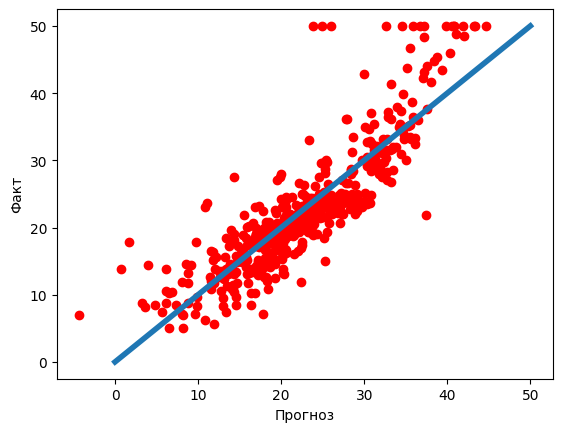

In [29]:
fig, ax = plt.subplots()
# график идеальной модели прогноз=факт :
ax.plot([0, 50], [0, 50], '-', lw=4)

# прогноз-факт
ax.scatter(lr.predict(x), target, color = 'r')

ax.set_xlabel('Прогноз')
ax.set_ylabel('Факт')
plt.show()

Кросс-валидация дает более корректную оценку точности прогнозной модели

In [30]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)
p = np.zeros_like(y)
for train, test in kf.split(x):
    lr.fit(x[train], y[train])
    p[test] = lr.predict(x[test])
rmse_cv = np.sqrt(mean_squared_error(p, y))
print ('RMSE при кросс-валидации = {:.4}'.format(rmse_cv))

RMSE при кросс-валидации = 6.09


Эластичная сеть - оценки модели

In [31]:
from sklearn.linear_model import Lasso, ElasticNet
en = ElasticNet(alpha = 0.5)
en.fit(x, y)
mse = mean_squared_error(y, en.predict(x))
print ('MSE на обучающей выборке = {:.4}'.format(mse))
rmse = np.sqrt(mse)
print ('RMSE на обучающей выборке = {:.4}'.format(rmse))
r2 = r2_score(y, en.predict(x))
print ('R2 на обучающей выборке = {:.4}'.format(r2))
p = np.zeros_like(y)
for train, test in kf.split(x):
    en.fit(x[train], y[train])
    p[test] = en.predict(x[test])
rmse_cv = np.sqrt(mean_squared_error(p, y))
print ('RMSE при кросс-валидации = {:.4}'.format(rmse_cv))

MSE на обучающей выборке = 24.85
RMSE на обучающей выборке = 4.985
R2 на обучающей выборке = 0.7056
RMSE при кросс-валидации = 5.55


На обучающей выборке погрешность больше, чем для обычной модели. Но результаты кросс-валидации лучше.

## Как увидеть влияние регуляризации на модель через ее параметры?

Lasso - визуализация влияния коэффициента регуляризации на коэффициенты модели

Для этого используется метод path объекта-модели.

Для графика удобнее использовать логарифмическую шкалу, то есть отображать порядок значений.

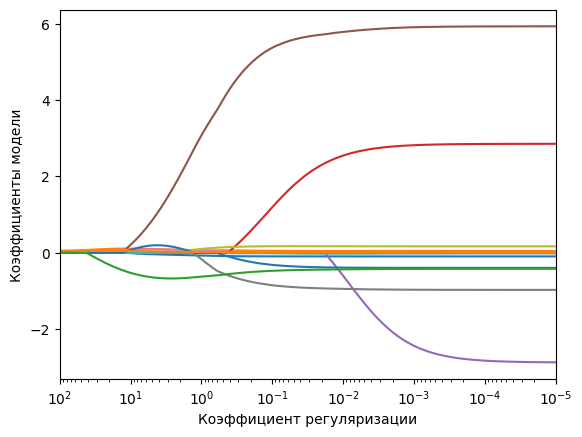

In [32]:
las = Lasso()
alphas = np.logspace(-5, 2, 1000) # логарифмическая шкала
alphas, coefs, _ = las.path(x, y, alphas = alphas)
fig, ax = plt.subplots()
ax.plot(alphas, coefs.T)
ax.set_xscale('log')
ax.set_xlim(alphas.max(), alphas.min())
ax.set_xlabel('Коэффициент регуляризации')
ax.set_ylabel('Коэффициенты модели')
plt.show()

Установление значений коэффициентов - обычное решение. По графику видно, что значимых признаков 3-5 (смотря что учитывать).